# Objectives

1. Identify Top-Performing Products and Categories: Analyze sales across different products and categories to determine which ones generate the most revenue.
2. Customer Segmentation Analysis: Segment customers by Segment and Region to see which groups contribute the most to sales.
3. Sales Trend Analysis Over Time: Identify patterns in sales by analyzing sales over time to spot trends and seasonal peaks.
4. Shipping Efficiency Evaluation: Evaluate shipping modes and shipping times to determine the most efficient shipping method and whether delays affect sales.
5. Geographic Sales Analysis: Identify high-performing states, cities, or regions, which could inform future targeting or resource allocation.

# Step 1: Load Libraries and Dataset

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("train.csv")  # Replace with your actual file path

# Ensure 'Order Date' and 'Ship Date' are in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

# Display dataset overview
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Step 2: Insight 1 - Top-Performing Products and Categories

In [ ]:
# Total sales by category
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Category:\n", category_sales)

# Total sales by sub-category
subcategory_sales = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Sub-Category:\n", subcategory_sales)

Total Sales by Category:
 Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64
Total Sales by Sub-Category:
 Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


Insight: This will display the total sales by category and sub-category, helping you identify the top-performing segments.

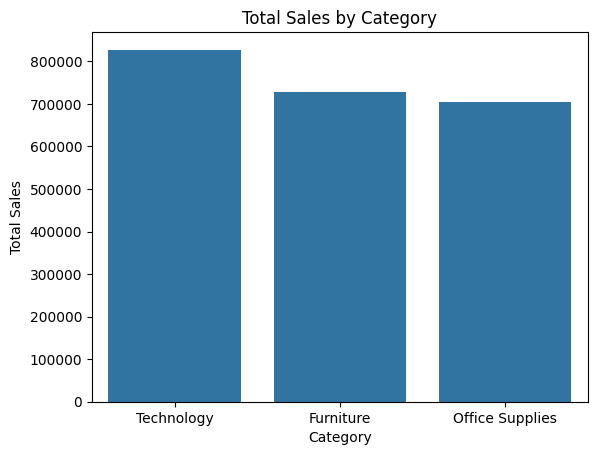

In [ ]:
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

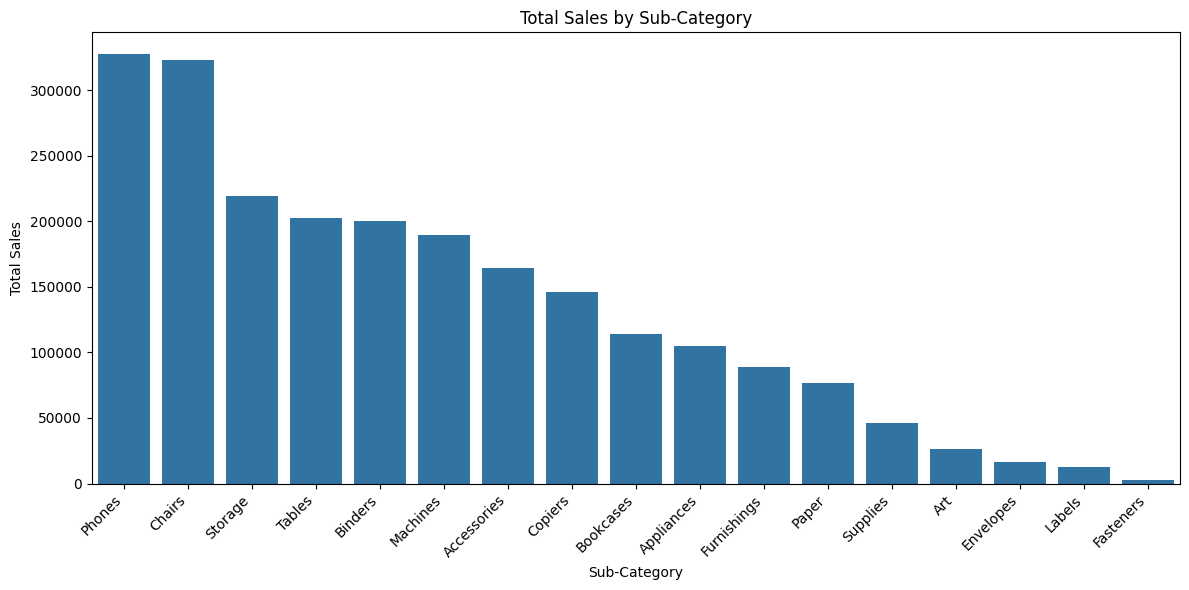

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.title("Total Sales by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

# Step 3: Insight 2 - Customer Segmentation Analysis

In [ ]:
# Total sales by customer segment
segment_sales = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Segment:\n", segment_sales)

# Total sales by region
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Region:\n", region_sales)

Total Sales by Segment:
 Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64
Total Sales by Region:
 Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


Insight: This breakdown helps identify which customer segments and regions are most profitable, guiding marketing efforts.

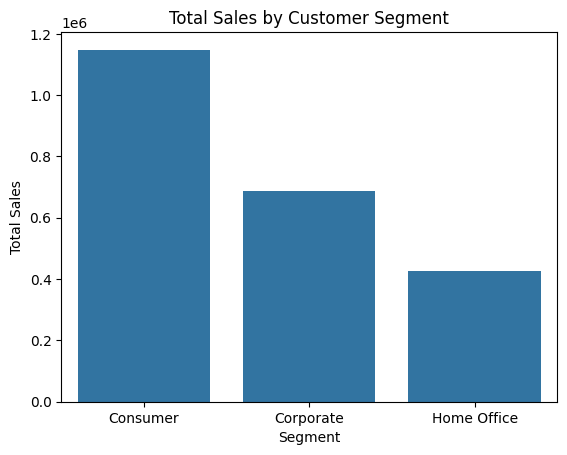

In [ ]:
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title("Total Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.show()

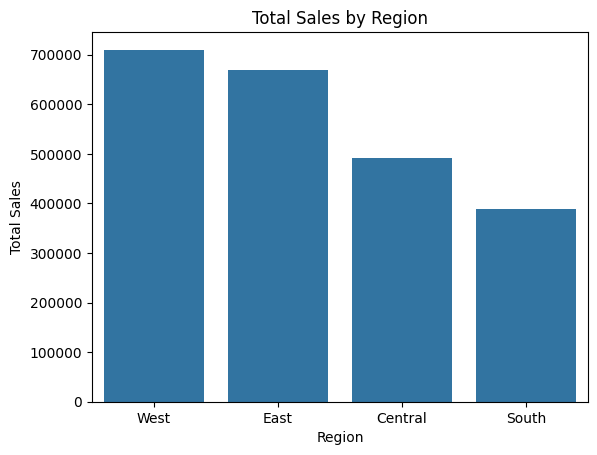

In [ ]:
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# Step 4: Insight 3 - Sales Trend Analysis Over Time

<ipython-input-32-43a3569e3e87>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.set_index('Order Date').resample('M')['Sales'].sum()


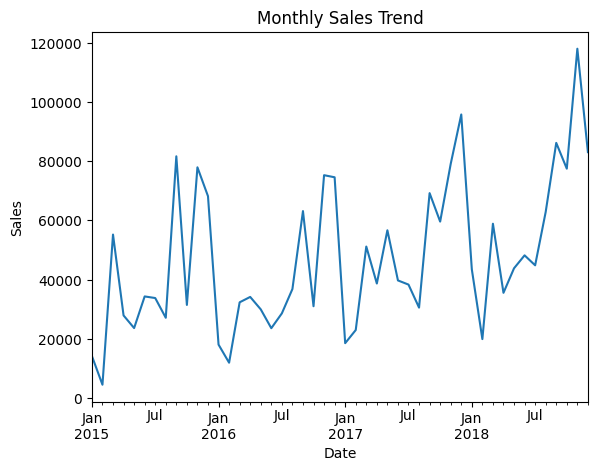

In [ ]:
# Resample data to monthly sales and plot
monthly_sales = data.set_index('Order Date').resample('M')['Sales'].sum()
monthly_sales.plot(title="Monthly Sales Trend", xlabel="Date", ylabel="Sales")
plt.show()

Insight: The trend line can reveal peak sales periods, helping plan for seasonal demand and inventory.

# Step 5: Insight 4 - Shipping Efficiency Evaluation

In [ ]:
# Average sales by ship mode
shipmode_sales = data.groupby('Ship Mode')['Sales'].mean().sort_values(ascending=False)
print("Average Sales by Ship Mode:\n", shipmode_sales)

# Calculate shipping duration (Ship Date - Order Date)
data['Shipping Duration'] = (data['Ship Date'] - data['Order Date']).dt.days

# Average shipping duration by ship mode
shipping_duration = data.groupby('Ship Mode')['Shipping Duration'].mean().sort_values()
print("Average Shipping Duration by Ship Mode:\n", shipping_duration)

Average Sales by Ship Mode:
 Ship Mode
Second Class      236.547939
Same Day          232.749143
First Class       230.228020
Standard Class    228.849856
Name: Sales, dtype: float64
Average Shipping Duration by Ship Mode:
 Ship Mode
Same Day          0.044610
First Class       2.179214
Second Class      3.249211
Standard Class    5.008363
Name: Shipping Duration, dtype: float64


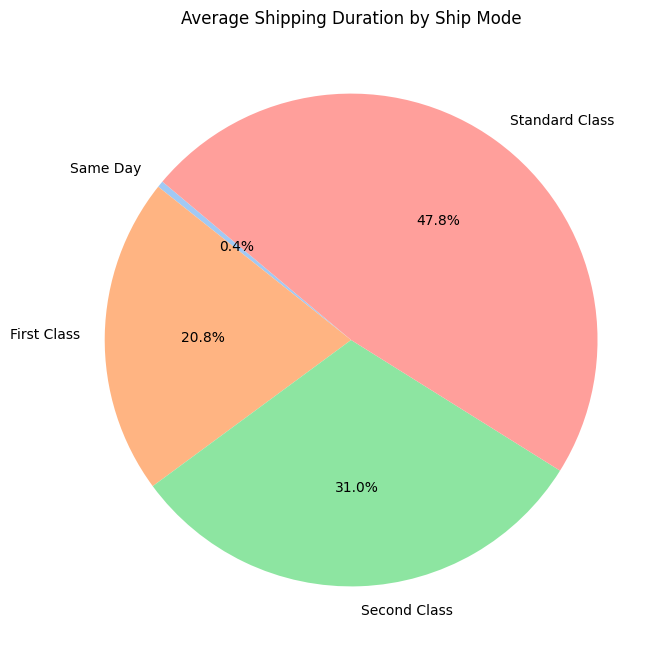

In [ ]:
# Plot a pie chart for average shipping duration by ship mode
plt.figure(figsize=(8, 8))
plt.pie(shipping_duration, labels=shipping_duration.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Average Shipping Duration by Ship Mode")
plt.show()

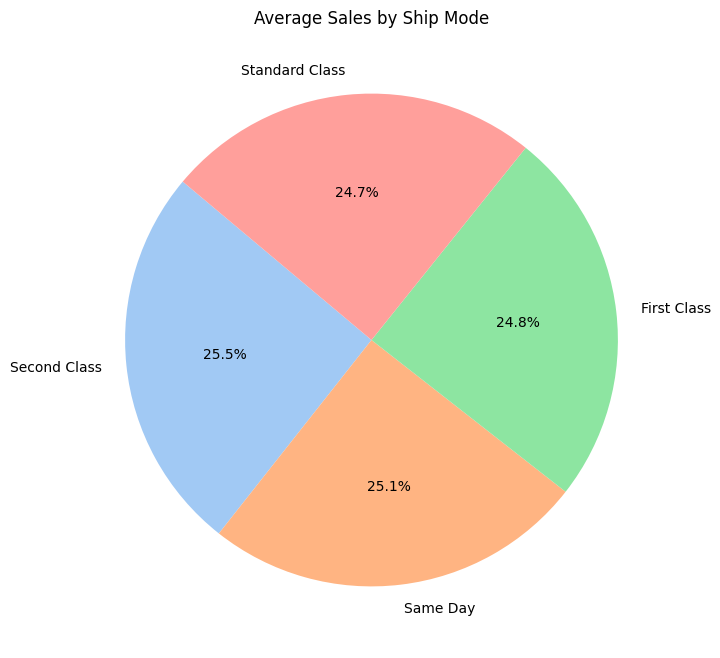

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(shipmode_sales, labels=shipmode_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Average Sales by Ship Mode")
plt.show()

# Step 6: Insight 5 - Geographic Sales Analysis

In [ ]:
# Sales by state
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by State (Top 10):\n", state_sales.head(10))

# Sales by city
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by City (Top 10):\n", city_sales.head(10))

Total Sales by State (Top 10):
 State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64
Total Sales by City (Top 10):
 City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64


Insight: Identifying top states and cities in terms of sales allows you to focus marketing and resources where demand is highest.

Text(0, 0.5, 'Total Sales')

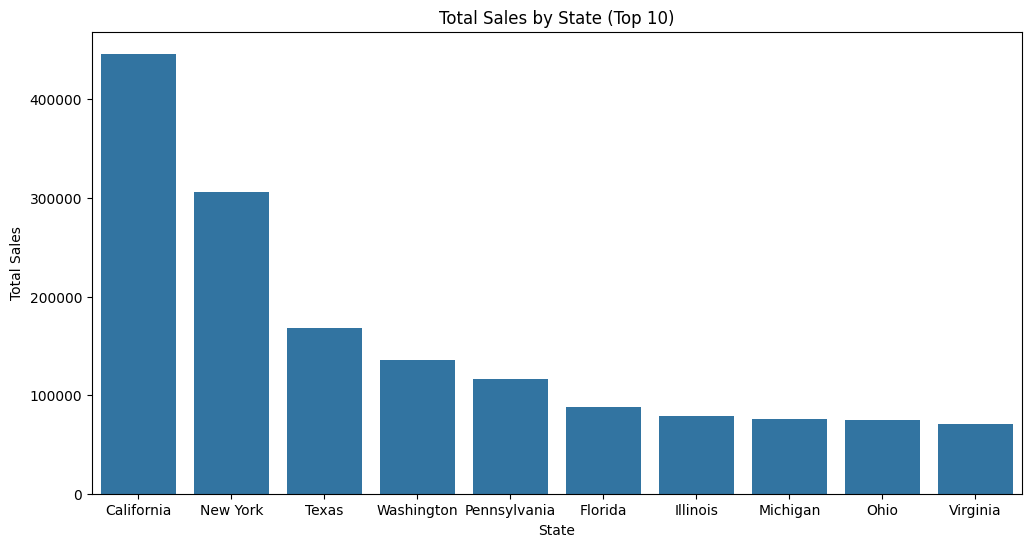

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.head(10).index, y=state_sales.head(10).values)
plt.title("Total Sales by State (Top 10)")
plt.xlabel("State")
plt.ylabel("Total Sales")

Text(0, 0.5, 'Total Sales')

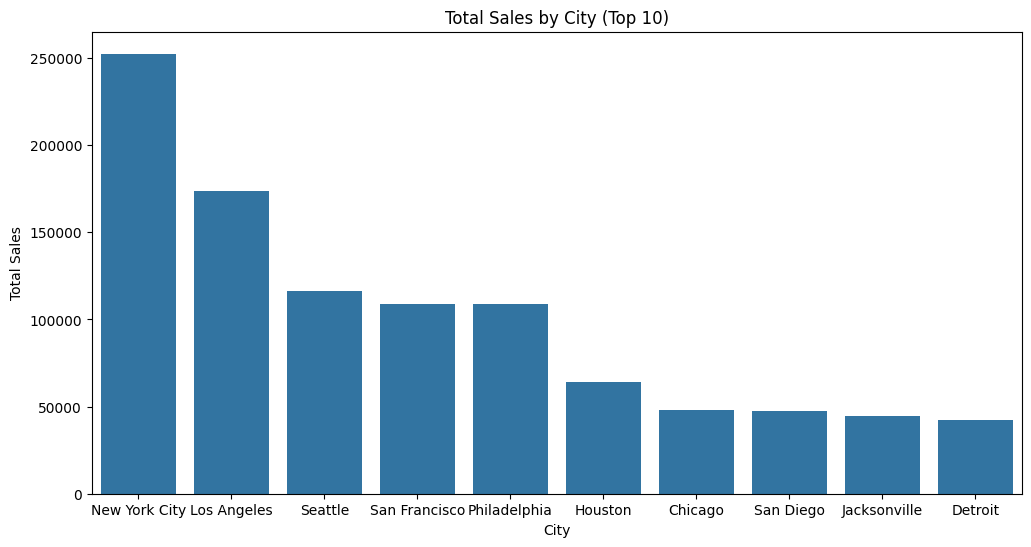

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.head(10).index, y=city_sales.head(10).values)
plt.title("Total Sales by City (Top 10)")
plt.xlabel("City")
plt.ylabel("Total Sales")